In [19]:
%matplotlib inline
#from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [3]:
import random
import pandas as pd
import shutil
import os

In [4]:
dataDir='/Users/isaacchristian/Desktop/Princeton/RESEARCH/CANS/'
#dataType='val2017'
dataType = 'train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [6]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=10.18s)
creating index...
index created!


In [7]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
furniture electronic appliance kitchen indoor sports person outdoor animal food accessory vehicle


# Begin 

In [8]:
## SET SEED ### 

In [54]:
random.seed(10)

In [55]:
# get all images containing given categories, select one at random
# which category?
catIds = coco.getCatIds(catNms=['person']);
# Get all picture Ids from that category
imgIds = coco.getImgIds(catIds=catIds );


In [56]:
# Length of images in category (people) for validation dataset 
len(imgIds)

64115

In [57]:
imgIds[:5]

[262145, 262146, 524291, 262148, 393223]

In [58]:
# Load capgaze data # 
capgaze = pd.read_csv(dataDir+'1629_capgaze_stimlist.csv')
# grab indices
capgaze_imgs = capgaze.iloc[:,0]

In [59]:
# Get image IDs # 
# num ids to randomly select
num_img = 5000

In [60]:
# Randomly Select some images from our category # 
rand_imgs = np.random.randint(0,len(imgIds),num_img)

In [61]:
# convert all category Ids to numpy for indexing 
img_ids_arr = np.asarray(imgIds)

In [62]:
# Get image indexes for all randomly selected images 
selected_imgs = img_ids_arr[rand_imgs]

In [63]:
# Throw out train images that we selected that are also in capgaze
selected_imgs_clean = []
for img in selected_imgs:
    if img not in np.asarray(capgaze_imgs):
        selected_imgs_clean.append(img)
len(selected_imgs_clean)

4866

In [71]:
# load all images using their indexes # 
all_img = coco.loadImgs(selected_imgs_clean)
# load one image # 
target = 7
img = all_img[target]

In [72]:
img

{'license': 5,
 'file_name': '000000022451.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000022451.jpg',
 'height': 375,
 'width': 500,
 'date_captured': '2013-11-18 00:31:17',
 'flickr_url': 'http://farm3.staticflickr.com/2507/4124115654_6e3df817b4_z.jpg',
 'id': 22451}

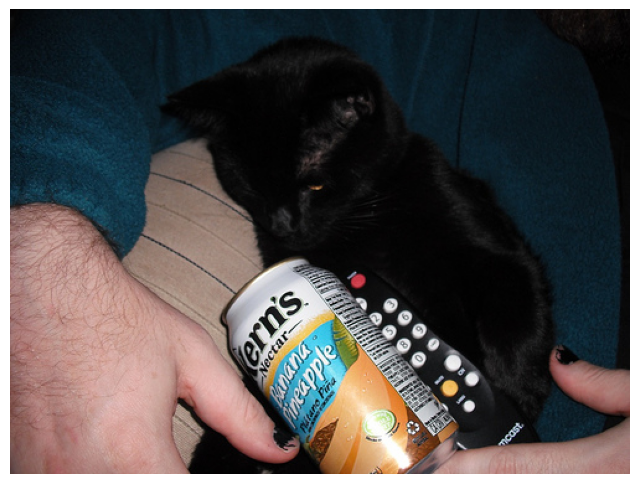

In [73]:
# load and display image
I = io.imread('%s/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
#I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [ ]:
# save dataset # 

In [67]:
dataDir

'/Users/isaacchristian/Desktop/Princeton/RESEARCH/CANS/'

In [75]:
my_id = []
my_jpg = []
for i in range(len(all_img)):
    my_id.append(all_img[i]['file_name'])
    my_jpg.append(all_img[i]['id'])
    
cols = np.column_stack((my_jpg,my_id, ))

In [76]:
dat = pd.DataFrame(cols,columns =['ID', "file_name"])

In [77]:
dat.to_csv(dataDir+'study_data'+"train2017_4866sample_3-6-23.csv")

# captions

In [17]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!


A man is in a kitchen making pizzas.
Man in apron standing on front of oven with pans and bakeware
A baker is working in the kitchen rolling dough.
A person standing by a stove in a kitchen.
A table with pies being made and a person standing near a wall with pots and pans hanging on the wall.


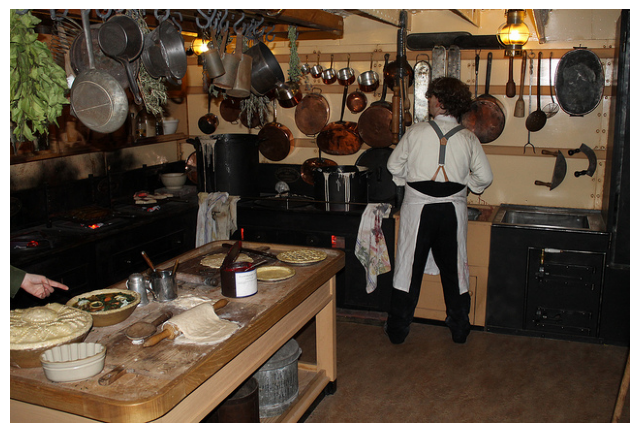

In [18]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()

# Find capgaze with persons

In [22]:
# seedy #
random.seed(10)

In [42]:
dataDir='/Users/isaacchristian/Desktop/Princeton/RESEARCH/CAPA/'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
capgaze = "cap_gaze2-corpus2/3000_images/"

In [34]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=13.03s)
creating index...
index created!


In [35]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
person animal indoor furniture sports vehicle appliance outdoor food electronic kitchen accessory


In [36]:
# get all images containing given categories, select one at random
# which category?
catIds = coco.getCatIds(catNms=['person']);
# Get all picture Ids from that category
imgIds = coco.getImgIds(catIds=catIds );


# Begin

In [37]:
# load all images using their indexes # 
all_img = coco.loadImgs(imgIds)

In [38]:
# length #
len(all_img)

64115

In [77]:
all_img[0]

{'license': 2,
 'file_name': '000000262145.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000262145.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-20 02:07:55',
 'flickr_url': 'http://farm8.staticflickr.com/7187/6967031859_5f08387bde_z.jpg',
 'id': 262145}

In [44]:
directory

'/Users/isaacchristian/Desktop/Princeton/RESEARCH/CAPA/cap_gaze2-corpus2/3000_images/'

# Load capgaze 2 

In [73]:
directory = dataDir + capgaze 
cap_gaze_imgs = []
cap_gaze_num = []
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        cap_gaze_imgs.append(f)
        cap_gaze_num.append(f[-16:])

In [74]:
cap_gaze_imgs[0]

'/Users/isaacchristian/Desktop/Princeton/RESEARCH/CAPA/cap_gaze2-corpus2/3000_images/COCO_train2014_000000492293.jpg'

In [76]:
len(cap_gaze_num)

3000

In [79]:
cap_gaze_num[:5]

['000000492293.jpg',
 '000000182505.jpg',
 '000000491942.jpg',
 '000000567018.jpg',
 '000000190667.jpg']

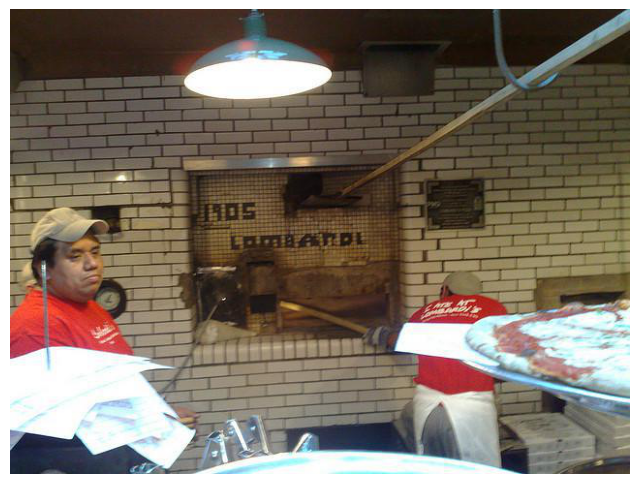

In [50]:
# load and display image
I = io.imread(cap_gaze_imgs[1])
# use url to load image
#I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [18]:
all_img

[{'license': 3,
  'file_name': '000000532481.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000532481.jpg',
  'height': 426,
  'width': 640,
  'date_captured': '2013-11-20 16:28:24',
  'flickr_url': 'http://farm7.staticflickr.com/6048/5915494136_da3cfa7c5a_z.jpg',
  'id': 532481},
 {'license': 1,
  'file_name': '000000458755.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000458755.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-16 23:06:51',
  'flickr_url': 'http://farm6.staticflickr.com/5119/5878453277_eea657a01d_z.jpg',
  'id': 458755},
 {'license': 1,
  'file_name': '000000385029.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000385029.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-21 05:40:19',
  'flickr_url': 'http://farm5.staticflickr.com/4061/4670536748_8c7bd89494_z.jpg',
  'id': 385029},
 {'license': 4,
  'file_name': '000000311303.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/00000

In [ ]:
# Find images in capgaze with people

In [84]:
intersect = []
trak_count = 0
for img_num in range(len(all_img)):
    if all_img[img_num]['file_name'] in cap_gaze_num:
        intersect.append(all_img[img_num])
        trak_count+=1
        

In [85]:
trak_count

1629

In [87]:
intersect[0]['file_name'] 

'000000000109.jpg'

# Create Datasets 

In [10]:
f'{dataDir}study_data/final_stim_list/sub-008_stimuli.csv'

'/Users/isaacchristian/Desktop/Princeton/RESEARCH/CANS/study_data/final_stim_list/sub-008_stimuli.csv'

In [11]:
sub_file = pd.read_csv(f'{dataDir}study_data/final_stim_list/sub-008_stimuli.csv')

In [30]:
pics = np.asarray(sub_file['imageLocation'])

In [1]:
targ_dir = '/Users/isaacchristian/Desktop/Princeton/RESEARCH/CANS/pygaze_stuff/examples/analysis/imgs'

In [80]:
my_study_dat = dataDir + '/study_data/train2017_coco_4866/'


In [35]:
for pic in pics:
    src = dataDir+dataType+ "/"+pic[-16:] 
    shutil.copy(src, targ_dir)
    

In [34]:
src

'/Users/isaacchristian/Desktop/Princeton/RESEARCH/CANS/train2017/000000122001.jpg'

In [ ]:
#### What about categor!!!! ******** ### 
"""
need to do roughly the same amount of category? or should i just pull from all?
naa do an equal proportion -- so find all categories that contain person, and balance
print an excel file with the pic num and the ID num
decision to include == yes or no?
"""

In [ ]:
# make excel file # 

In [97]:
my_id = []
my_jpg = []
for i in range(len(intersect)):
    my_id.append(intersect[i]['file_name'])
    my_jpg.append(intersect[i]['id'])
    
cols = np.column_stack((my_jpg,my_id, ))

In [98]:
dat = pd.DataFrame(cols,columns =['ID', "file_name"])

In [99]:
dat.to_csv(dataDir+"1629_train_capgaze_person_2-20-23.csv")

In [78]:
len(all_img)

4866